In [1]:
# Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow torch nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:

# Load the data
data = pd.read_excel('/content/Multilingual PUBG Reviews for Sentiment Analysis.xlsx')

# Preprocess the data
def preprocess_data(data):
    """Preprocess the raw data."""
    try:
        # Convert date columns to datetime
        data['Review_Publication_Date'] = pd.to_datetime(data['Review_Publication_Date'])
        data['Review_Updated_Date'] = pd.to_datetime(data['Review_Updated_Date'])

        # Drop unnecessary columns
        data.drop(['Recommendation_ID', 'Review_Updated_Date'], axis=1, inplace=True)

        # Scale 'Playtime' column
        scaler = MinMaxScaler()
        data['Playtime'] = scaler.fit_transform(data[['Playtime']])

        # Encode categorical variables
        le_recommend_tag = LabelEncoder()
        data['Recommend_Tag'] = le_recommend_tag.fit_transform(data['Recommend_Tag'])
        le_language_tag = LabelEncoder()
        data['Language_Tag'] = le_language_tag.fit_transform(data['Language_Tag'])

        return data
    except Exception as e:
        print(f"Error preprocessing data: {e}")
        return None

data = preprocess_data(data)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32321 (\N{CJK UNIFIED IDEOGRAPH-7E41}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dis

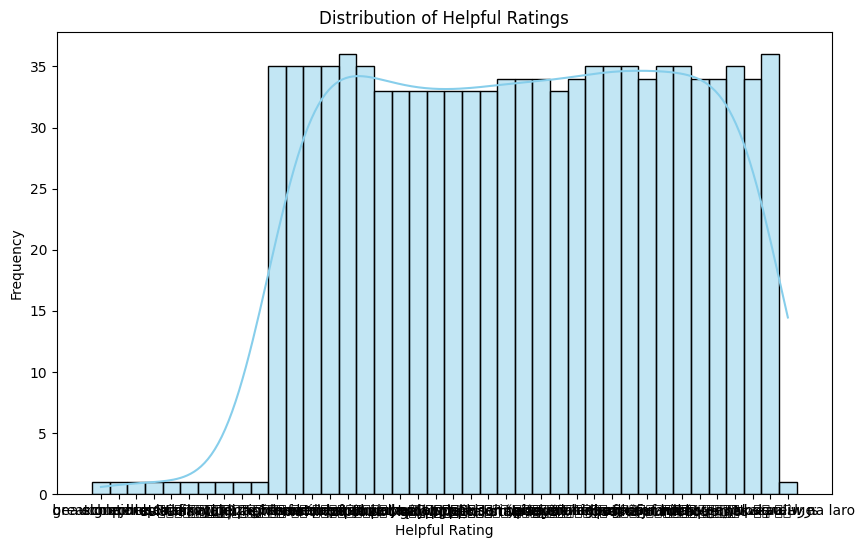

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.histplot(data['Helpful_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Helpful Ratings')
plt.xlabel('Helpful Rating')
plt.ylabel('Frequency')
plt.show()


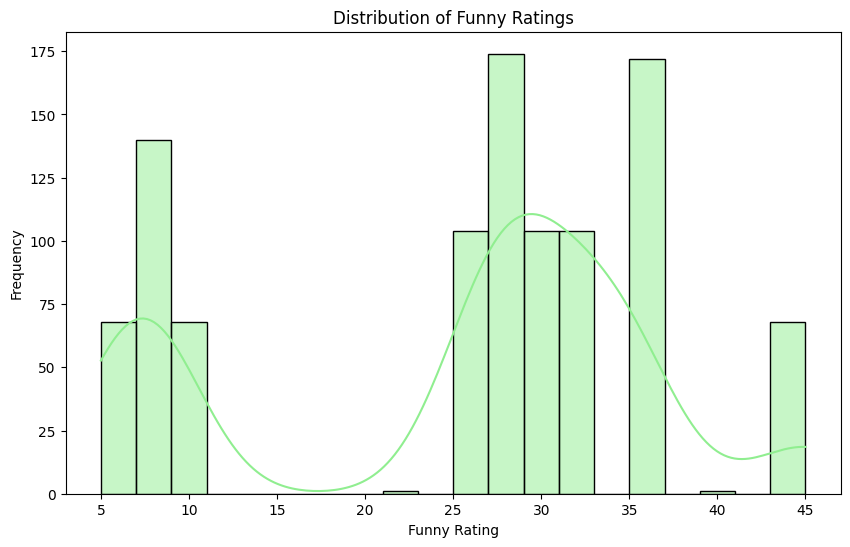

In [5]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Funny_Rating'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Funny Ratings')
plt.xlabel('Funny Rating')
plt.ylabel('Frequency')
plt.show()


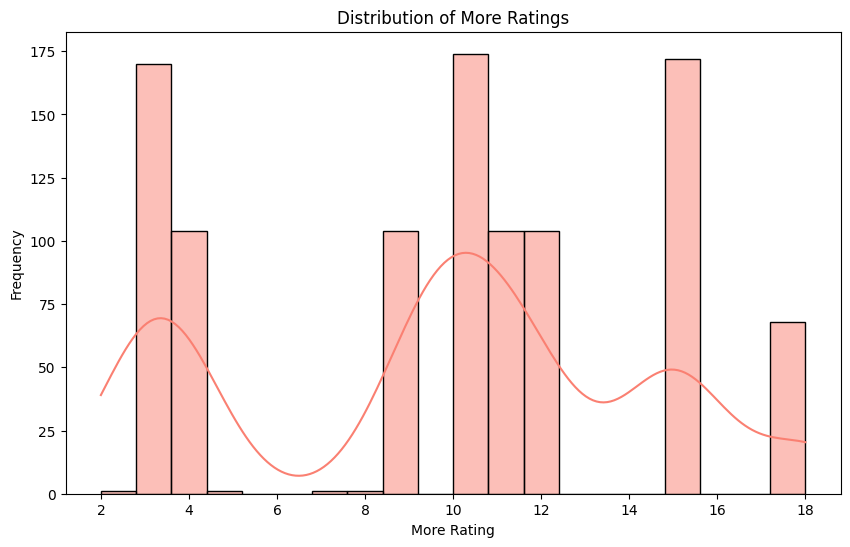

In [6]:

plt.figure(figsize=(10, 6))
sns.histplot(data['More_Rating'], bins=20, kde=True, color='salmon')
plt.title('Distribution of More Ratings')
plt.xlabel('More Rating')
plt.ylabel('Frequency')
plt.show()




<ipython-input-7-8fce9ce07ca8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[['Helpful_Rating', 'Funny_Rating', 'More_Rating']].corr(), annot=True, cmap='coolwarm', fmt=".2f")


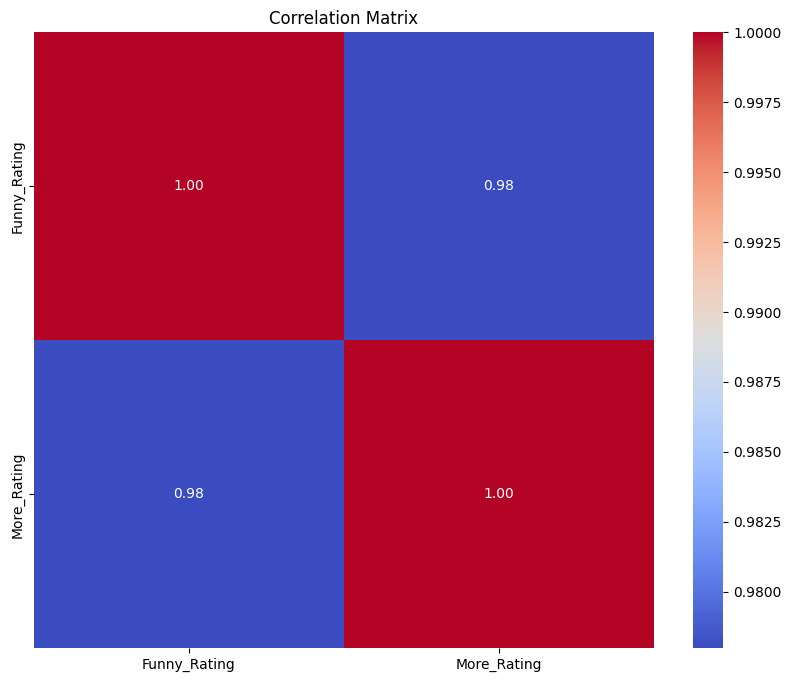

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Helpful_Rating', 'Funny_Rating', 'More_Rating']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


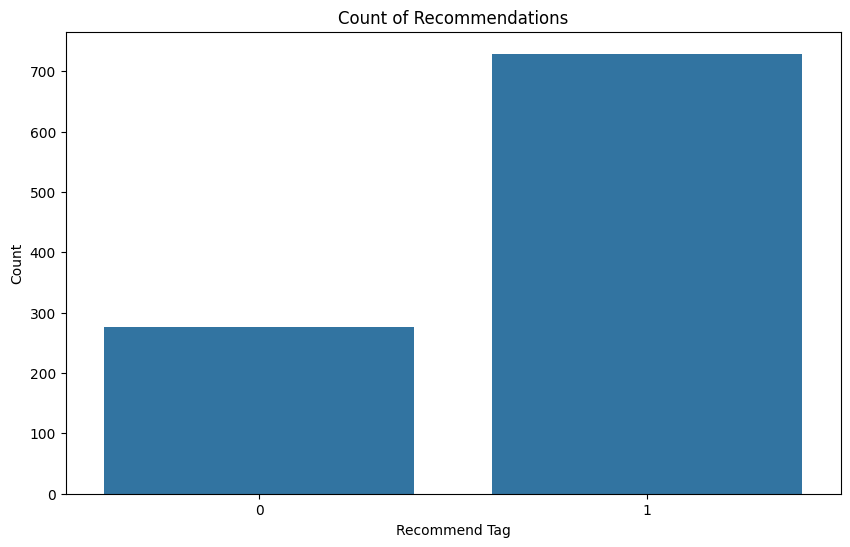

In [8]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Recommend_Tag')
plt.title('Count of Recommendations')
plt.xlabel('Recommend Tag')
plt.ylabel('Count')
plt.show()



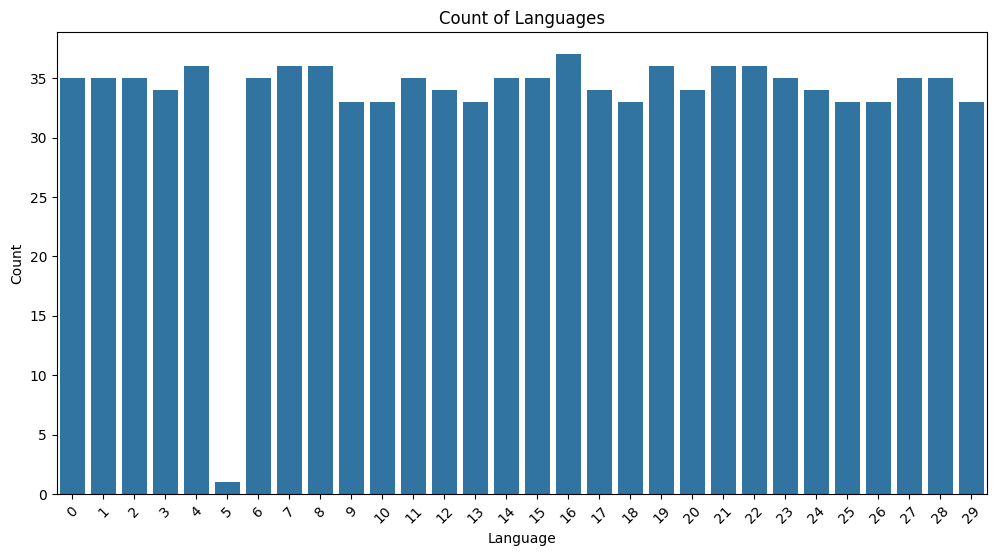

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Language_Tag')
plt.title('Count of Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


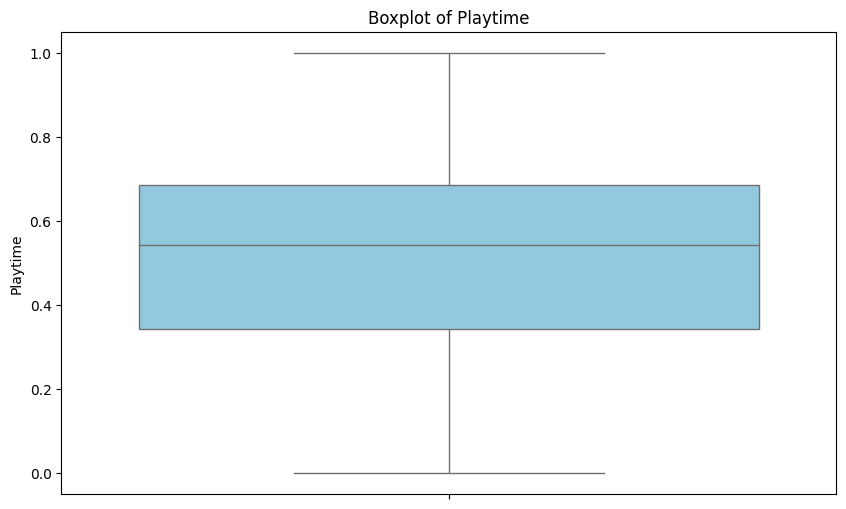

In [10]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Playtime', color='skyblue')
plt.title('Boxplot of Playtime')
plt.ylabel('Playtime')
plt.show()



<ipython-input-12-2b467cb54609>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Recommend_Tag', y=data.index, estimator=len, palette='pastel')


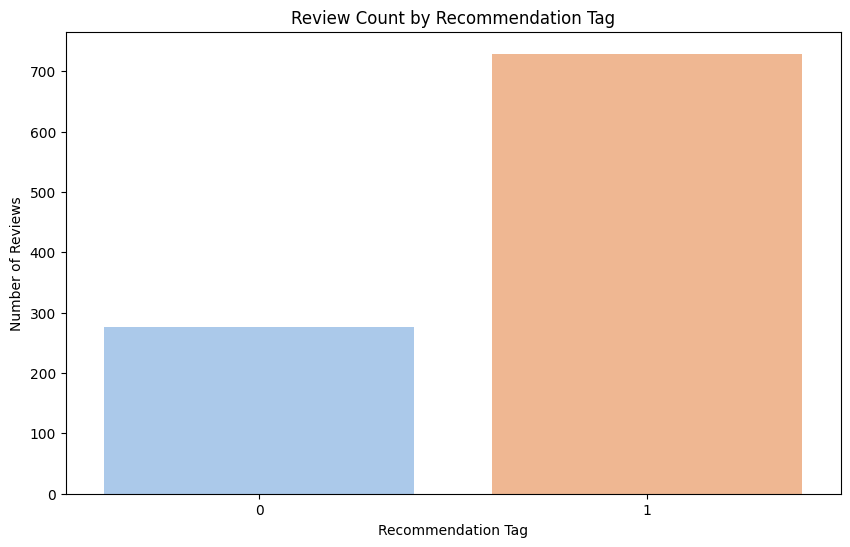

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Recommend_Tag', y=data.index, estimator=len, palette='pastel')
plt.title('Review Count by Recommendation Tag')
plt.xlabel('Recommendation Tag')
plt.ylabel('Number of Reviews')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32321 (\N{CJK UNIFIED IDEOGRAPH-7E41}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dis

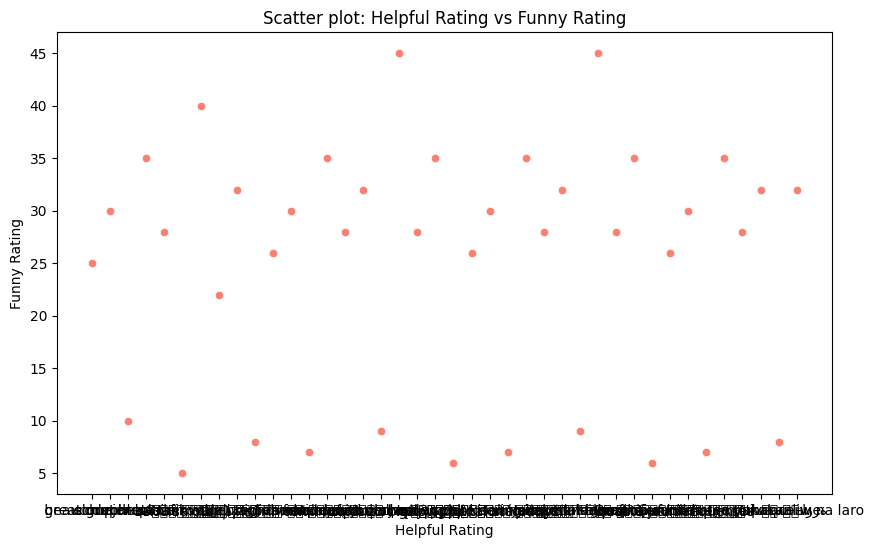

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Helpful_Rating', y='Funny_Rating', color='salmon')
plt.title('Scatter plot: Helpful Rating vs Funny Rating')
plt.xlabel('Helpful Rating')
plt.ylabel('Funny Rating')
plt.show()


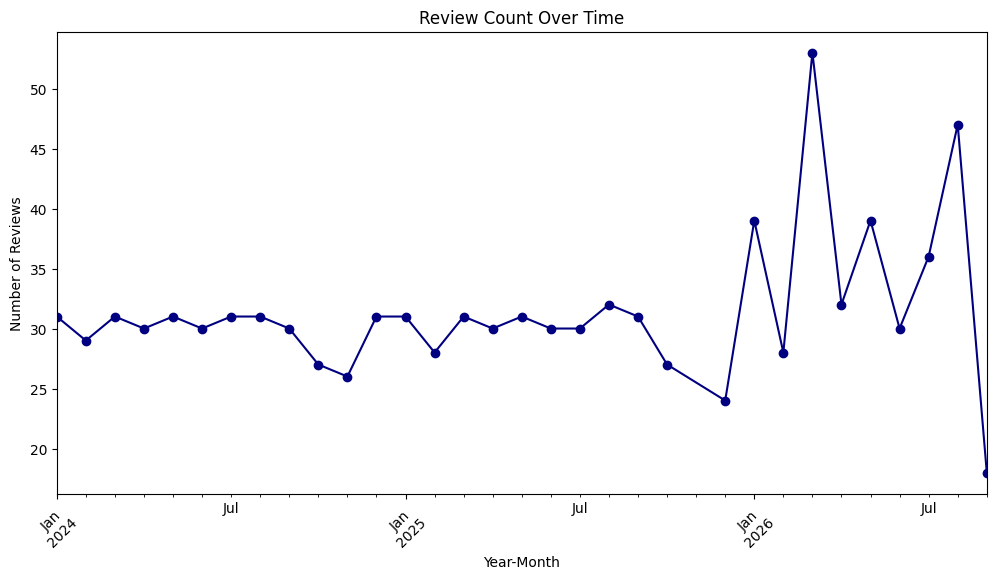

In [14]:

plt.figure(figsize=(12, 6))
data['Review_Publication_Date'] = pd.to_datetime(data['Review_Publication_Date'])
data['Year-Month'] = data['Review_Publication_Date'].dt.to_period('M')
review_count_by_month = data.groupby('Year-Month').size()
review_count_by_month.plot(marker='o', color='navy')
plt.title('Review Count Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()



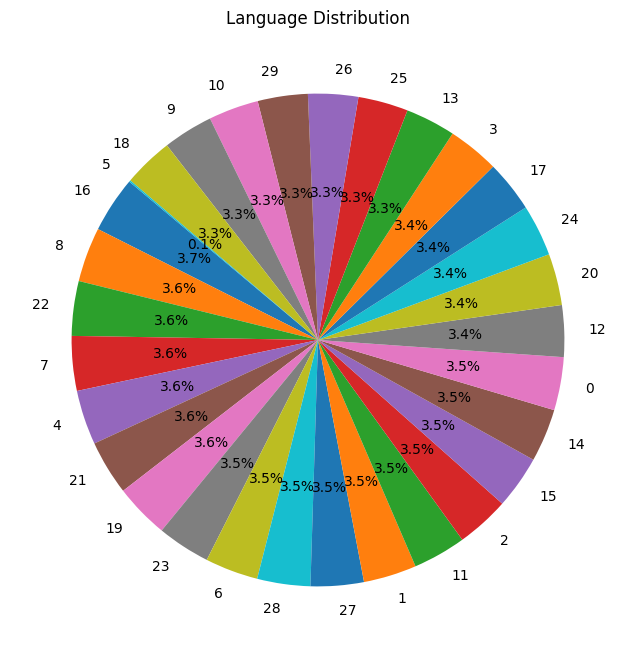

In [15]:
plt.figure(figsize=(8, 8))
language_counts = data['Language_Tag'].value_counts()
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution')
plt.show()

In [16]:

# Handle missing values
def handle_missing_values(data):
    """Handle missing values."""
    try:
        print(data.isnull().any())
        print(data.isnull().sum())
        data.dropna(inplace=True)
        print(data.isnull().sum())
        return data
    except Exception as e:
        print(f"Error handling missing values: {e}")
        return None

data = handle_missing_values(data)


User_ID                    False
Review_Publication_Date    False
Playtime                   False
Recommend_Tag              False
Language_Tag               False
Review_Content             False
Helpful_Rating              True
Funny_Rating                True
More_Rating                 True
Unnamed: 11                 True
Year-Month                 False
dtype: bool
User_ID                    0
Review_Publication_Date    0
Playtime                   0
Recommend_Tag              0
Language_Tag               0
Review_Content             0
Helpful_Rating             1
Funny_Rating               1
More_Rating                1
Unnamed: 11                1
Year-Month                 0
dtype: int64
User_ID                    0
Review_Publication_Date    0
Playtime                   0
Recommend_Tag              0
Language_Tag               0
Review_Content             0
Helpful_Rating             0
Funny_Rating               0
More_Rating                0
Unnamed: 11                0
Yea

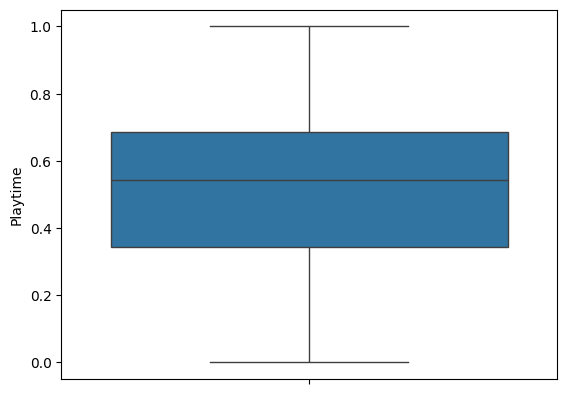

In [17]:

# Outlier detection and removal
def remove_outliers(data):
    """Remove outliers using IQR method."""
    try:
        Q1 = data['Playtime'].quantile(0.25)
        Q3 = data['Playtime'].quantile(0.75)
        IQR = Q3 - Q1
        data = data[~((data['Playtime'] < (Q1 - 1.5 * IQR)) | (data['Playtime'] > (Q3 + 1.5 * IQR)))]
        sns.boxplot(data['Playtime'])
        plt.ylabel('Playtime')
        plt.show()
        return data
    except Exception as e:
        print(f"Error removing outliers: {e}")
        return None

data = remove_outliers(data)


In [18]:

def select_features(data):
    """Select features and target variable."""
    try:
        target = data['Helpful_Rating']
        features = data.drop(['User_ID', 'Review_Publication_Date', 'Playtime','Recommend_Tag','Funny_Rating','More_Rating','Unnamed: 11','Language_Tag'], axis=1)
        return features, target
    except Exception as e:
        print(f"Error selecting features: {e}")
        return None, None

features, target = select_features(data)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32321 (\N{CJK UNIFIED IDEOGRAPH-7E41}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dis

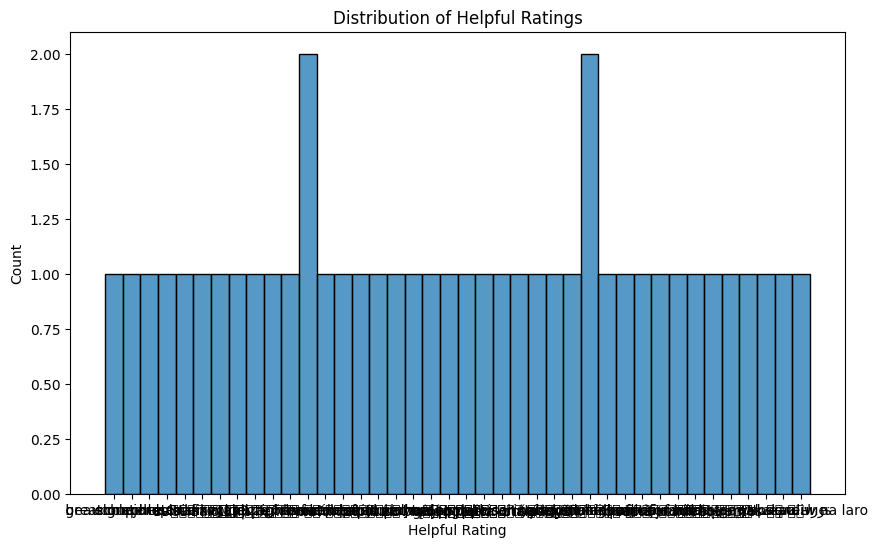

In [19]:

# Text preprocessing
def preprocess_text(text):
    """Preprocess text data."""
    try:
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word.isalpha()]
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [stemmer.stem(word) for word in tokens]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error preprocessing text: {e}")
        return None

def preprocess_text_data(data):
    """Preprocess text data and visualize the distribution of helpful ratings."""
    try:
        df_text = data[['Review_Content', 'Helpful_Rating']].dropna().drop_duplicates()
        df_text['Review_Content'] = df_text['Review_Content'].apply(preprocess_text)

        # Data Visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df_text['Helpful_Rating'])
        plt.title('Distribution of Helpful Ratings')
        plt.xlabel('Helpful Rating')
        plt.ylabel('Count')
        plt.show()

        return df_text
    except Exception as e:
        print(f"Error preprocessing text data: {e}")
        return None

df_text = preprocess_text_data(data)


In [20]:

# Splitting the data
def split_data(features, target):
    """Split the data into training and testing sets."""
    try:
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test
    except Exception as e:
        print(f"Error splitting the data: {e}")
        return None, None, None, None

X_train, X_test, y_train, y_test = split_data(features, target)


In [21]:

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

print(features.columns)




Index(['Review_Content', 'Helpful_Rating', 'Year-Month'], dtype='object')


In [26]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Text vectorization
def vectorize_text(X_train, X_test):
    """Vectorize text data."""
    try:
        vectorizer = TfidfVectorizer()
        X_train_vectorized = vectorizer.fit_transform(X_train)
        X_test_vectorized = vectorizer.transform(X_test)
        return vectorizer, X_train_vectorized, X_test_vectorized
    except Exception as e:
        print(f"Error vectorizing text: {e}")
        return None, None, None

# Assuming you have X_train and X_test DataFrames with 'Review_Content' column
vectorizer, X_train_vectorized, X_test_vectorized = vectorize_text(X_train['Review_Content'], X_test['Review_Content'])

# Save the vectorizer
def save_vectorizer(vectorizer, path):
    with open(path, 'wb') as file:
        pickle.dump(vectorizer, file)

# Save the vectorizer if it's defined
if vectorizer is not None:
    save_vectorizer(vectorizer, 'vectorizer.pickle')
else:
    print("Vectorizer is not defined. Make sure vectorization is successful.")


In [23]:
# Hyperparameters
input_size_text = X_train_vectorized.shape[1]  # Size of input features
hidden_size_text = 128  # Number of features in the hidden state of LSTM
num_layers_text = 2  # Number of LSTM layers
output_size_text = 1  # Size of the output (helpful rating)

# Initialize the model
model_text = LSTMModel(input_size_text, hidden_size_text, num_layers_text, output_size_text)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_text.to(device)

# Define loss function and optimizer
criterion_text = nn.MSELoss()
optimizer_text = optim.Adam(model_text.parameters(), lr=0.001)

# Convert labels to numerical labels
le = LabelEncoder()
y_train_numerical = le.fit_transform(y_train)
y_test_numerical = le.transform(y_test)

# Convert the numerical labels to PyTorch tensors
y_train_tensor = torch.tensor(y_train_numerical, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_numerical, dtype=torch.float32).to(device)

# Convert data to tensor and move to device
X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32).to(device)

# Define DataLoader for training data
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model_text.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer_text.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs = inputs.unsqueeze(1)

        outputs = model_text(inputs)
        loss = criterion_text(outputs.squeeze(), labels)
        loss.backward()
        optimizer_text.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')
# Evaluation
model_text.eval()
with torch.no_grad():
    # Forward pass on test data
    outputs = model_text(X_test_tensor.unsqueeze(1))
    predictions = (outputs.squeeze().cpu().numpy() >= 0.5).astype(int)
    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test_numerical, predictions))


    # Calculate additional metrics
    test_accuracy = accuracy_score(y_test_numerical, predictions)
    test_precision = precision_score(y_test_numerical, predictions, average='macro')
    test_recall = recall_score(y_test_numerical, predictions, average='macro')
    test_f1 = f1_score(y_test_numerical, predictions, average='macro')

    # Print evaluation metrics
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')


Epoch [1/10], Loss: 487.2551
Epoch [2/10], Loss: 453.0887
Epoch [3/10], Loss: 319.1071
Epoch [4/10], Loss: 169.8037
Epoch [5/10], Loss: 109.1200
Epoch [6/10], Loss: 85.6630
Epoch [7/10], Loss: 71.8192
Epoch [8/10], Loss: 53.2624
Epoch [9/10], Loss: 39.1296
Epoch [10/10], Loss: 30.2589
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.04      1.00      0.07         7
           3       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [24]:
# Save the trained LSTM model
torch.save(model_text.state_dict(), 'lstm_sentiment_analysis_model.pth')


In [27]:


# Define a function to predict the sentiment using the loaded LSTM model
def predict_sentiment(input_text, loaded_vectorizer, loaded_lstm_model):
    # Preprocess the input text
    input_text = preprocess_input_text(input_text)

    # Vectorize the preprocessed input text using the loaded vectorizer
    input_vector = loaded_vectorizer.transform([input_text])

    # Predict the sentiment using the loaded LSTM model
    with torch.no_grad():
        model_input = torch.tensor(input_vector.toarray(), dtype=torch.float32).to(device)
        model_input = model_input.unsqueeze(1)  # Add a dimension for sequence length (sequence length = 1 in your case)
        output = loaded_lstm_model(model_input)
        prediction = (output.squeeze().cpu().numpy() >= 0.5).astype(int)

    # Map the prediction to the corresponding sentiment label
    sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    sentiment_label = sentiment_labels[prediction[0]]

    return sentiment_label


In [28]:
# Define the LSTM model, preprocessing functions, saving, and loading functions

import torch
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Define LSTMModel class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Save the LSTM model
def save_lstm_model(model, path):
    torch.save(model.state_dict(), path)

# Save the vectorizer
def save_vectorizer(vectorizer, path):
    with open(path, 'wb') as file:
        pickle.dump(vectorizer, file)

# Load the pre-trained LSTM model
def load_lstm_model(path):
    model = LSTMModel(input_size_text, hidden_size_text, num_layers_text, output_size_text)
    model.load_state_dict(torch.load(path))
    return model

# Load the vectorizer
def load_vectorizer(path):
    with open(path, 'rb') as file:
        vectorizer = pickle.load(file)
    return vectorizer

# Paths for saving and loading the models
save_lstm_model_path = 'lstm_sentiment_analysis_model.pth'
save_vectorizer_path = 'vectorizer.pickle'
lstm_model_path = 'lstm_sentiment_analysis_model.pth'
vectorizer_path = 'vectorizer.pickle'

# Load the LSTM model and the vectorizer
loaded_lstm_model = load_lstm_model(lstm_model_path)
loaded_vectorizer = load_vectorizer(vectorizer_path)

